In [1]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.mnist import load_data

import matplotlib.pyplot as plt

from numpy import reshape
import matplotlib.pyplot as plt


In [2]:
(xtrain, _), (xtest, _) = load_data()

xtrain_ = xtrain.astype('float32') / 255
xtest_ = xtest.astype('float32') / 255
print(xtrain_.shape, xtest_.shape) 

x_train = reshape(xtrain_, (len(xtrain), 28, 28, 1)) 
x_test = reshape(xtest_, (len(xtest), 28, 28, 1)) 
print(x_train.shape, x_test.shape) 


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


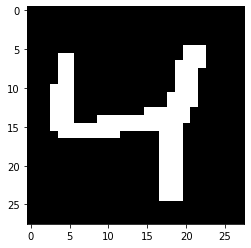

In [3]:
import matplotlib.pyplot as plt
from PIL import Image


img = Image.fromarray(xtrain[2])
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()


In [4]:
input_img = Input(shape=(28, 28, 1))

enc_conv1 = Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)
enc_pool1 = MaxPooling2D((2, 2), padding='same')(enc_conv1)
enc_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_pool1)
enc_ouput = MaxPooling2D((4, 4), padding='same')(enc_conv2)

dec_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_ouput)
dec_upsample2 = UpSampling2D((4, 4))(dec_conv2) # Adivinar como era esa imagen que ya era más pequeña 
dec_conv3 = Conv2D(12, (3, 3), activation='relu')(dec_upsample2)
dec_upsample3 = UpSampling2D((2, 2))(dec_conv3)
dec_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_upsample3)

autoencoder = Model(input_img, dec_output)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1544      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           1032      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 8)         0     

In [5]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, shuffle=True)

Epoch 1/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1867
Epoch 2/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1467
Epoch 3/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1372


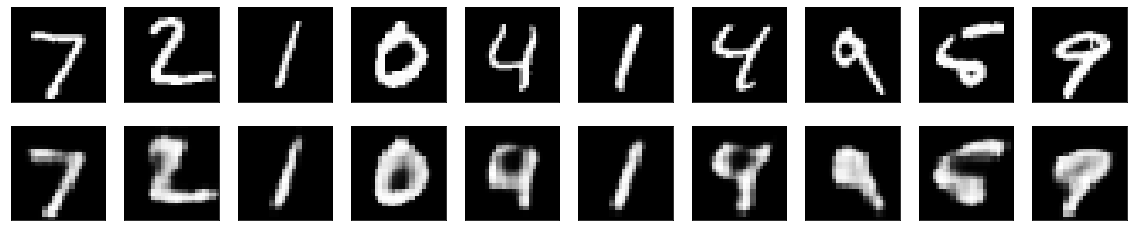

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()